# CC3001 Otoño 2023 Tarea  Valentina Alarcón Yáñez

# Calculadora

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Enunciado

Esta tarea consiste en desarrollar una calculadora de expresiones matemáticas al estilo Matlab o Maple, pero con capacidad de procesar un conjunto de comandos bien restringido. Algunos ejemplos de los comandos que acepta y de lo que debe imprimir en la salida van a continuación:

|Entrada (lo que el usuario escribe)   | Salida(lo que imprime el programa)  |
|---|---|
|n=5   | 5  |
|hanoi=2^n-1    |31   |
|var_1 = 23 - 13 + hanoi * 2    |82   |
|h2 = hanoi /2   |15   |
|n   |5   |

A continuación definimos más en detalle lo que se debe implementar:



1.   Cada comando es de la forma "variable=expresión". El efecto es que se debe calcular la expresión de la derecha, guardar el resultado en la variable de la izquierda e imprimir el resultado en la salida. Si se omite desde el "=" hacia adelante (como en el último ejemplo), solo se imprime el valor de la variable. Las variables comienzan con letra y continúan con letras, dígitos y el signo "_".
2.   Los operadores permitidos son "+","-","*", "/", "^".
3.   Solo se trabaja con números enteros y todas las operaciones dan resultado entero (incluyendo la división, que trunca).
4.   Para simplificar, no se puede usar paréntesis y la expresión se evalúa estrictamente de izquierda a derecha. Eso explica el resultado que se obtiene para "var_1".
5.   Si se utiliza una variable que aún no ha sido definida, se debe dar un error

      ERROR: variable indefinida "..."

6.   Si la sintaxis no es correcta, se debe imprimir en la salida un mensaje de la forma

      ERROR: al procesar "..."

      donde el string que se imprime es la parte de la entrada desde el punto del error hacia adelante.


Antes de empezar a escribir código, usted debe dibujar un diagrama de estados que describa la estructura de la entrada. Si le resulta más conveniente, pueden ser varios diagramas (por ejemplo, uno que describa la estructura de una variable, otro la de un número, otra la de un comando). Luego, a partir de ahí escriba el código que implementa esos diagramas. **Importante:** Su código debe ir procesando de un caracter a la vez, para este procesamiento no se puede utilizar funciones de Python que operen sobre strings de largo mayor que uno. Se recomienda tener una función que reciba un comando en un string y lo procese, y otra que se encargue de ir leyendo líneas una a una e invocando a la función antes mencionada para procesarlas.

Para almacenar los nombres y valores de las variables, está permitido el uso de un diccionario de Python.

En su entrega debe describir brevemente el problema, luego describir la estrategia de solución a través de los diagramas de estados, y a continuación el código ejecutable respectivo, agregando todas las explicaciones necesarias para que se entienda.



Descripción del problema:
Inicialmente tenemos dos funciones principales: procesar_comando(comando, dicc_var) y calculadora(lista_comandos).
La primera se encarga de analizar individualmente un comando que fue previamente guardado en un diccionario de forma ‘variable’:’operación’, resolver la operación asociada, y agregarlo al diccionario modificándolo. Si el comando que le llega es solo una variable y esta fue registrada previamente, entonces devuelve el resultado asociado a dicha variable.
La segunda función se encarga de tomar los comandos de una lista de comandos y guardarlos en un diccionario. Finalmente, utiliza la función “procesar_comando” y devuelve los resultados asociados a la lista de comandos.
Para que este proceso funcione correctamente, se tuvo que hacer por medio de un sistema de estados. Es por esto que se diseñó el siguiente diagrama de estados, y será explicado a lo largo del código escrito en este documento.


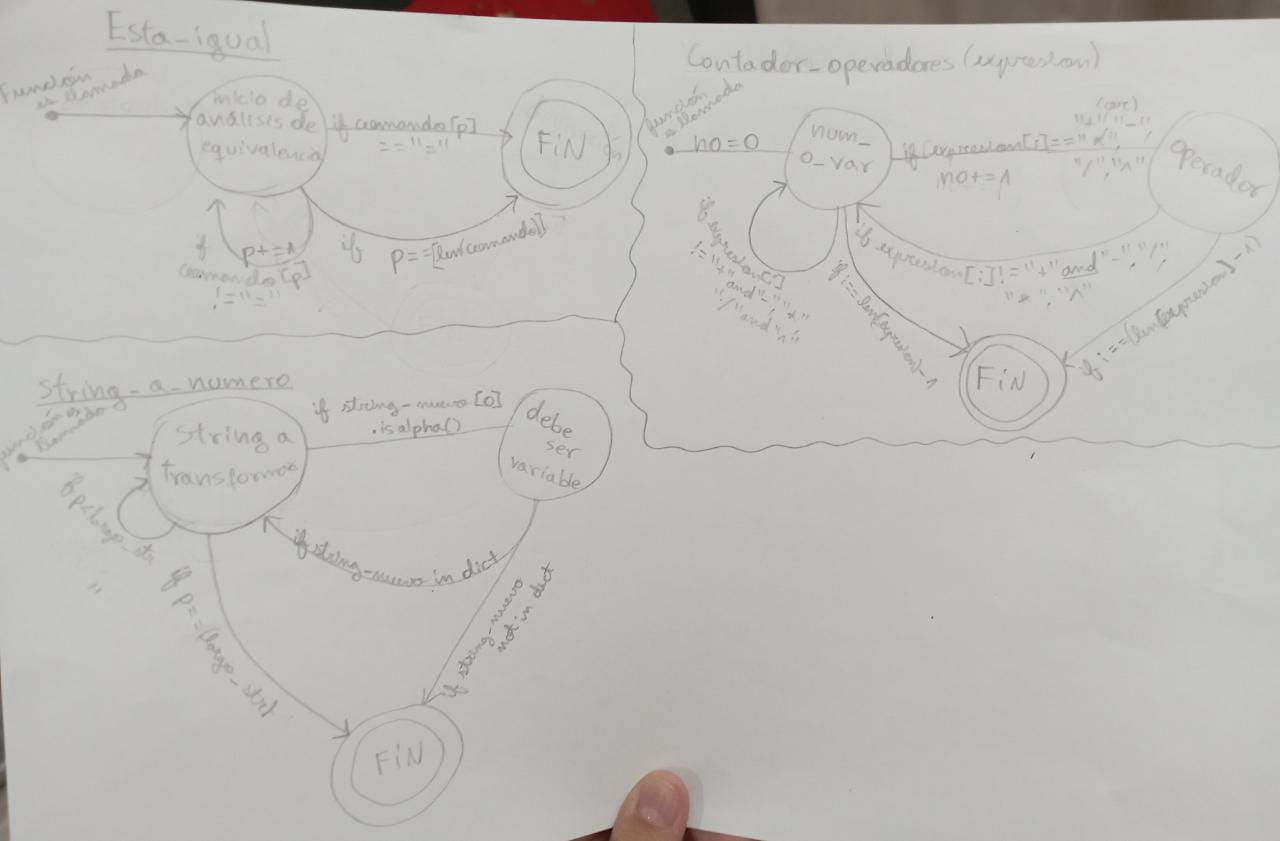

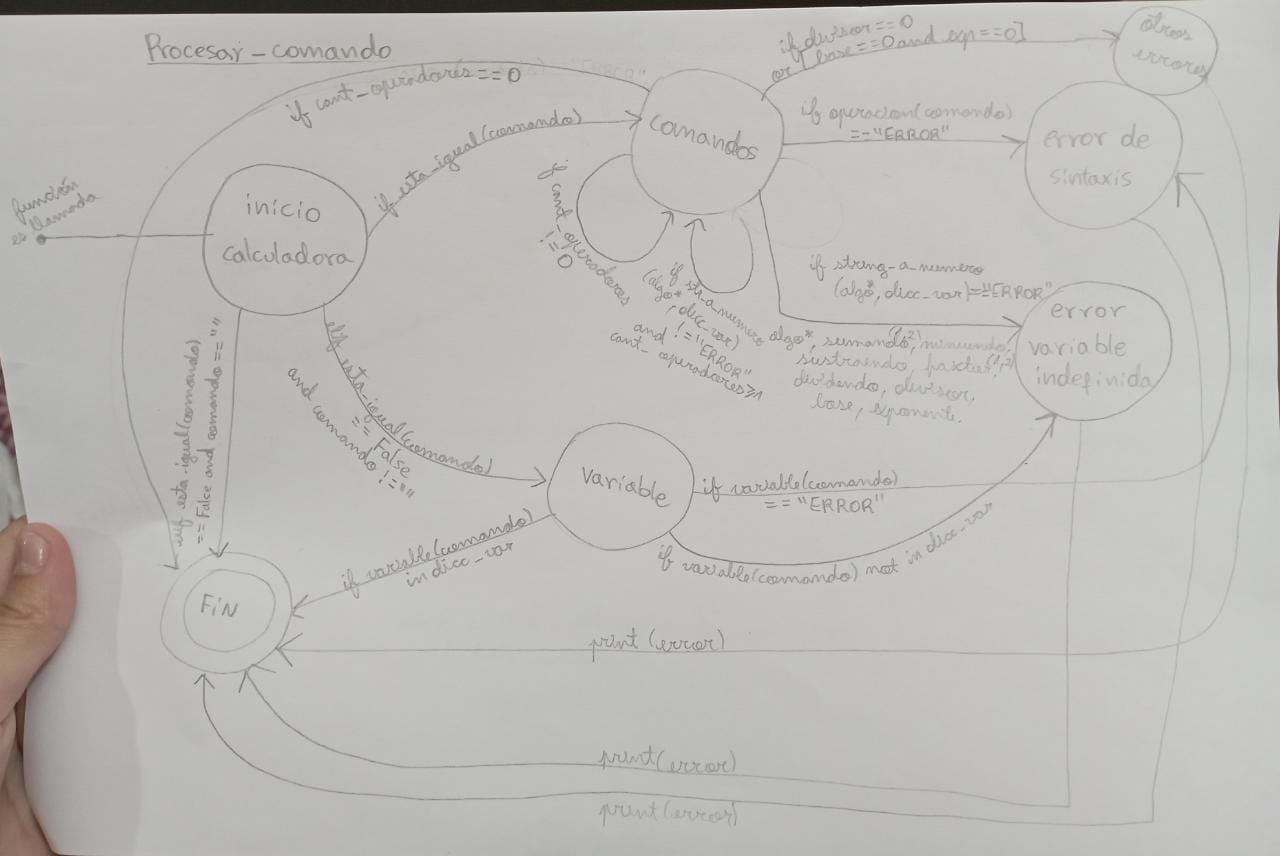

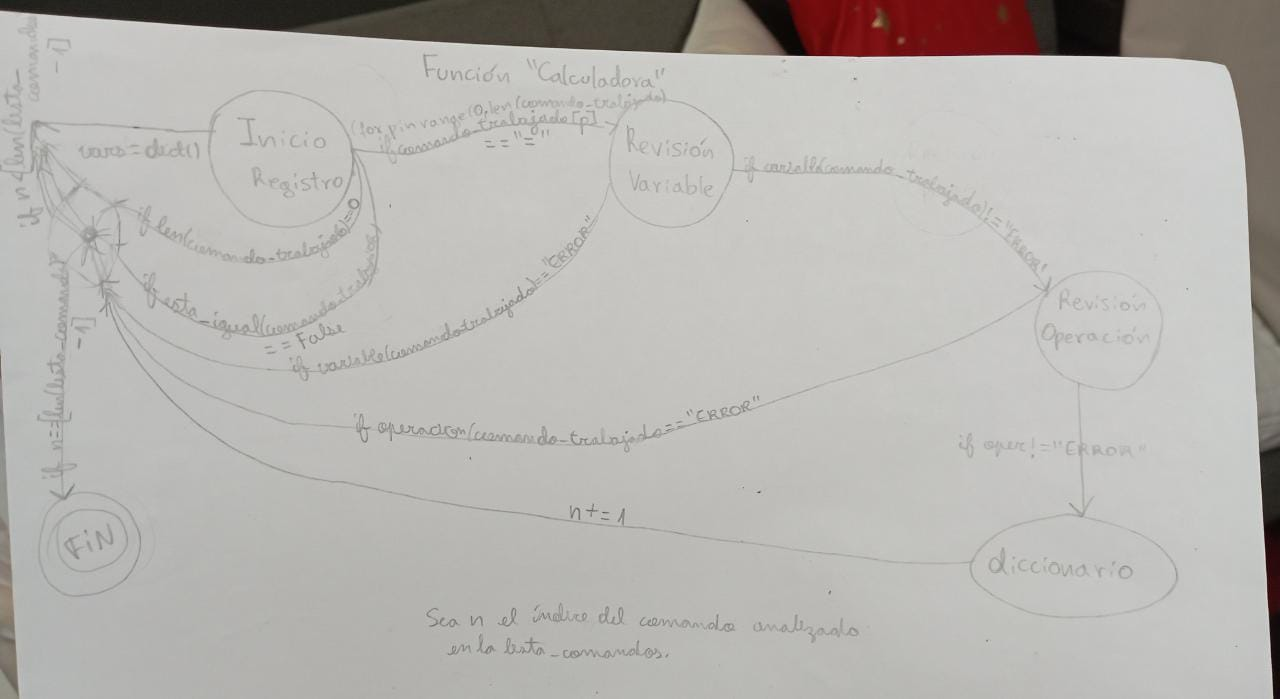

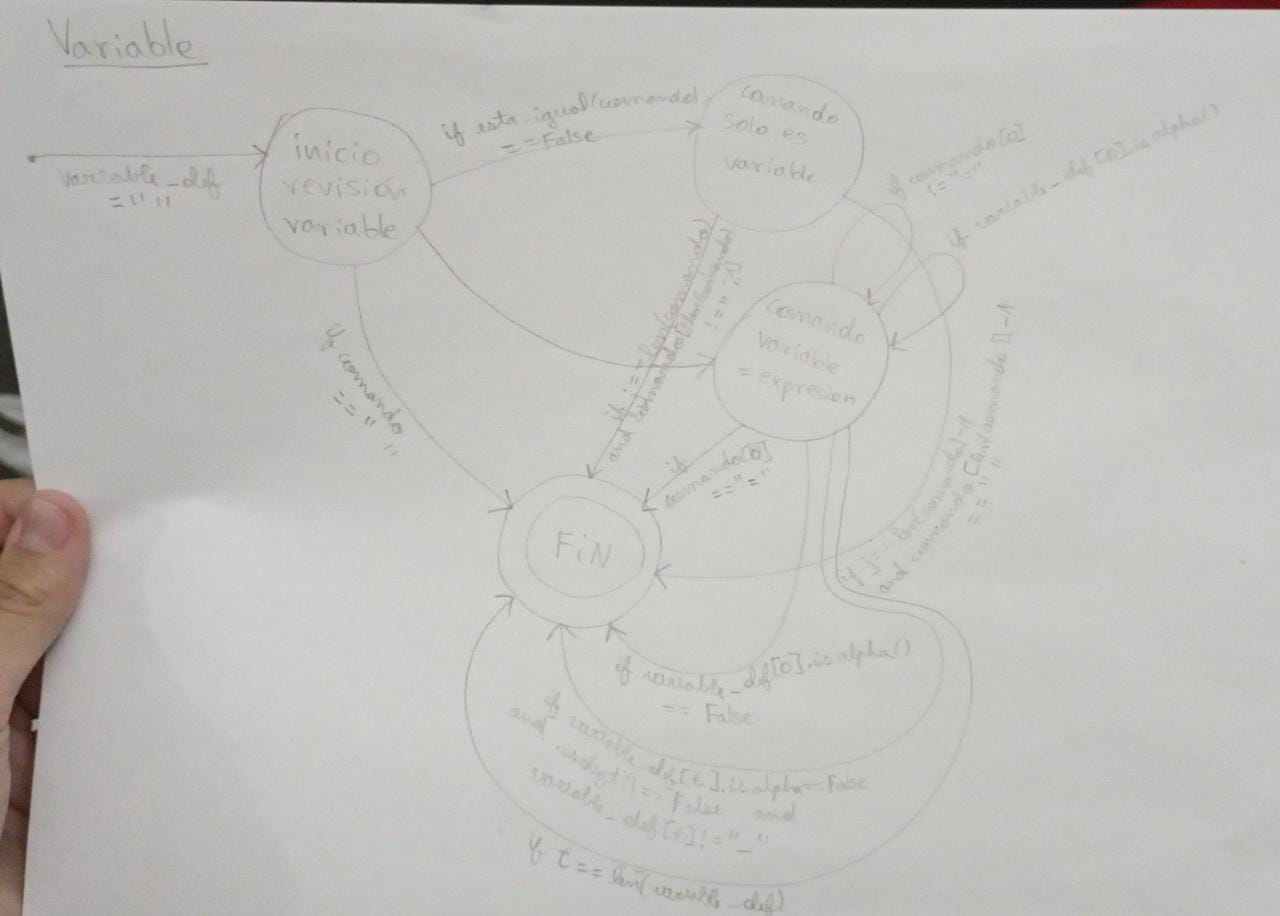

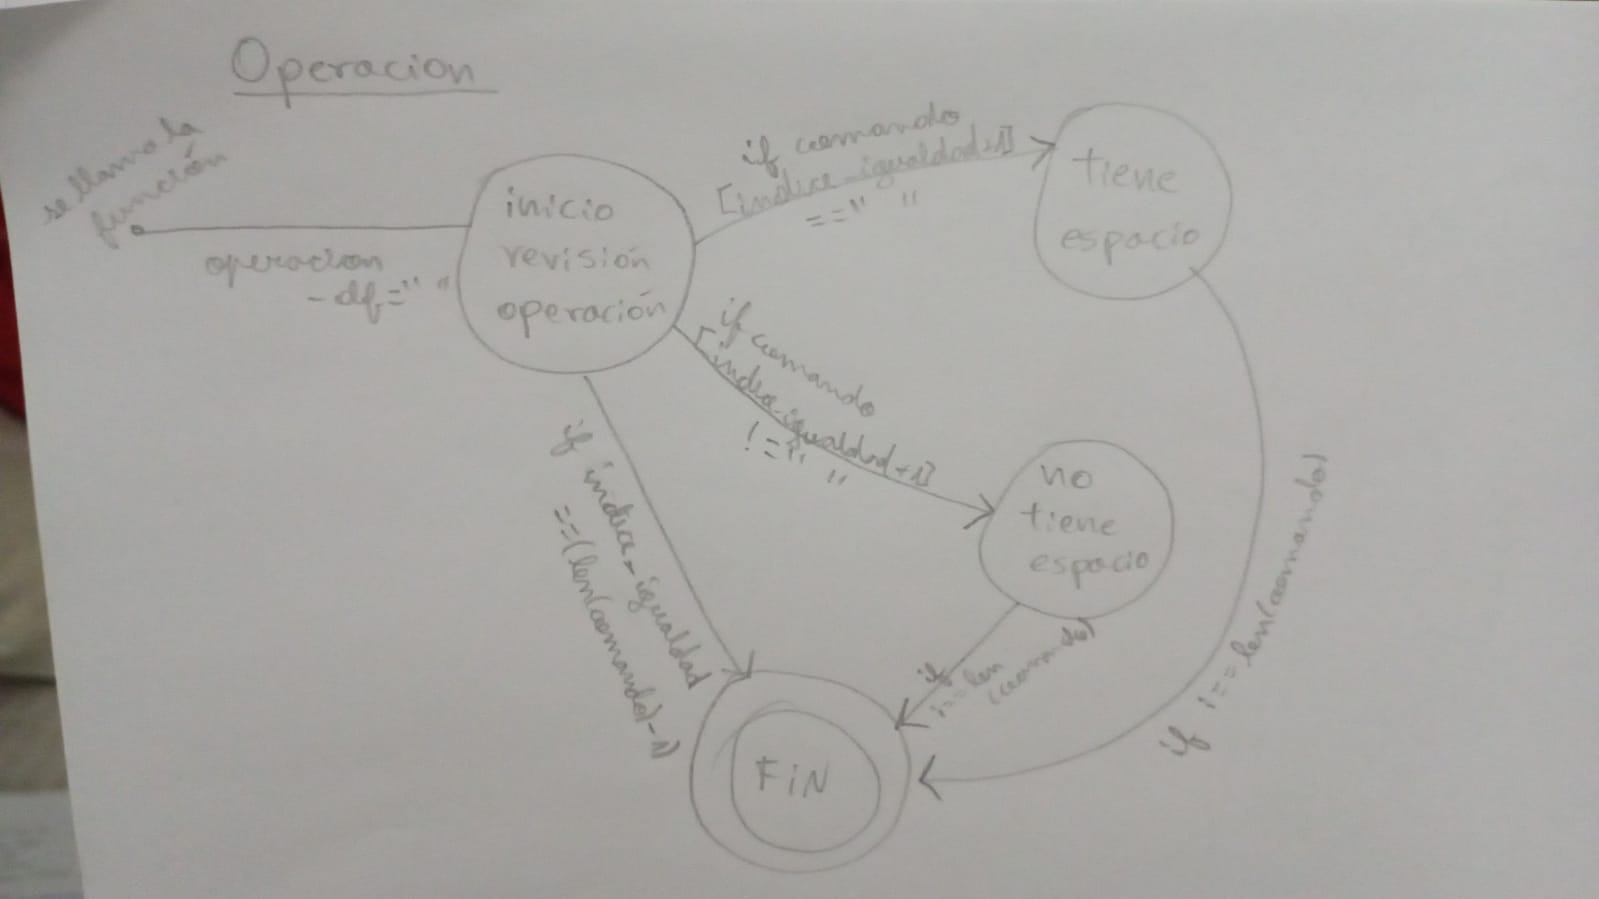

In [ ]:
# Inicialmente, crearé una función que analice un comando caracter por caracter
# Esta retorna True tan pronto encuentra un "=" en alguno de los índices analizados
# Y retorna False en caso de que el análisis haya sido fallido, y ningún índice haya tenido un "=".
# Esta función será útil para revisar a qué estado se debe ir la función cuando recibe un comando:
# Si simplemente tiene que imprimir el resultado o si debe analizar un comando de forma variable=expresión.

def esta_igual(comando):
  estado="inicio de análisis de equivalencia"
  for p in range(0,len(comando)):
    if comando[p]=="=":
      estado="fin"
      return True
    else:
      estado="inicio de análisis de equivalencia"
  else:
    estado="fin"
    return False

In [ ]:
# Luego, crearé dos funciones auxiliares: variable(comando) y operacion(comando).
# La primera recibe un comando, el cual puede tener forma "variable=operacion" o ser simplemente una variable
# Lo analiza tal que:
# 1. Si el comando es simplemente un espacio " ", entonces arroja error.
# 2. Si el comando no tiene un "=", entonces se va al estado "comando solo es variable" y se redefine sin espacios
# 3. Si el comando tiene un "=", entonces se va al estado "comando variable=expresion",
# extrae solo la parte previa al "=", le saca los espacios y lo retorna.
# Retorna "ERROR" si es que: "=" se encuentra en la primera posición, y si la variable tiene problemas de sintaxis
# Finalmente, vuelve al estadio previo a ser inicializada.
# La segunda hace algo muy similar, solo tomando la parte después del "=" del comando
# y quitándole espacios que pueda tener al inicio.


def variable(comando):
  estado="inicio revisión variable"
  variable_def=""
  if comando==" ":
    return "ERROR"
  if esta_igual(comando)==False:
    estado="comando solo es variable"
    if comando[0]==" ":
      if comando[len(comando)-1]!=" ":
        for j in range(1,len(comando)):
          variable_def=variable_def+comando[j]
        return variable_def
      else:
        for j in range(1,len(comando)-1):
          variable_def=variable_def+comando[j]
        return variable_def
    else:
      if comando[len(comando)-1]!=" ":
        for j in range(0,len(comando)):
          variable_def=variable_def+comando[j]
        return variable_def
      else:
        for j in range(0,len(comando)-1):
          variable_def=variable_def+comando[j]
        return variable_def
  else:
    estado="comando variable=expresion"
    for k in range(0,len(comando)):
      if comando[k]=='=':
        indice_igualdad=k
        if k==0:
          return "ERROR"
    if comando[indice_igualdad-1]==" ":
      for i in range(0,indice_igualdad-1):
        variable_def = variable_def + comando[i]
    else:
      for i in range(0,indice_igualdad):
        variable_def = variable_def + comando[i]
    if variable_def[0].isalpha()==False:
      return "ERROR"
    elif variable_def[0].isalpha():
      resp = variable_def
      for t in range(1,len(variable_def)):
        if variable_def[t].isalpha()==False and variable_def[t].isdigit()==False and variable_def[t]!="_":
          resp = "ERROR"
      return resp
  # estado final será aquel en el que estaba antes de iniciar esta función auxiliar.

def operacion(comando):
  estado="inicio revision operacion"
  operacion_def=""
  for k in range(0,len(comando)):
    if comando[k]=='=':
      indice_igualdad=k
      if k==(len(comando)-1):
        return "ERROR"
  if comando[indice_igualdad+1]==" ":
    estado="tiene espacio"
    for i in range(indice_igualdad+2,len(comando)):
      operacion_def = operacion_def + comando[i]
  else:
    estado="no tiene espacio"
    for i in range(indice_igualdad+1,len(comando)):
      operacion_def = operacion_def + comando[i]
      #la parte de revisar la sintaxis de la operación se verá en procesar_comando

  return operacion_def
  # estado final será aquel en el que estaba antes de iniciar esta función auxiliar.

In [ ]:
# Luego, crearé una función auxiliar que cuente la cantidad de operadores que hay en una expresión
# Esta será útil para cuando se deba resolver la operación asociada a un comando en "procesar_comando"

def contador_operadores(expresion):
  no=0
  estado="num_o_var"
  for i in range(0,len(expresion)):
    if estado=="num_o_var":
      if expresion[i]=="+" or expresion[i]=="-" or expresion[i]=="*" or expresion[i]=="/" or expresion[i]=="^":
        no+=1
        estado="operador"
    else: #estado="operador"
      if expresion[i]!="+" and expresion[i]!="-" and expresion[i]!="*" and expresion[i]!="/" and expresion[i]!="^":
        estado="num_o_var"
  return no
  # estado final será aquel en el que estaba antes de iniciar esta función auxiliar.

In [ ]:
# La siguiente función auxiliar recibe un string y un diccionario.
# El diccionario es aquel que se va forma en calculadora()
# El string tiene dos opciones: puede ser un '(número)' o '(variable)'
# Lo recibe, le quita los espacios que puede tener, y
# Si era número, lo transforma carácter por carácter a "int" y, uniéndolos, forma el entero asociado.
# Si era variable, busca si existe en el diccionario.
# Si existe, extrae el resultado asociado
# Si no existe, retorna ERROR.


def string_a_numero(string,dict):
  estado="string a transformar"
  número_completo=[]
  número_final=int()
  string_nuevo = string
  if string[0]==" ":
    string_nuevo = ""
    for p in range(1,len(string)-1):
      string_nuevo= string_nuevo+string[p]
    if string[len(string)-1]!=" ":
      string_nuevo= string_nuevo+string[len(string)-1]
  elif string[len(string)-1]==" ":
    string_nuevo= ""
    for p in range(0,len(string)-1):
      string_nuevo= string_nuevo+string[p]
  if string_nuevo[0].isalpha():
    # tenemos una variable.
    estado="debe ser variable"
    if string_nuevo in dict:
      número_asociado= dict[string_nuevo]
      estado="string a transformar"
    else:
      return "ERROR"
      # vuelve al estado en el que estaba previo a inicializar la función
  else:
    número_asociado= string_nuevo
  if estado=="string a transformar":
    largo_str=len(número_asociado)
    for p in range(0,largo_str):
      número=int(número_asociado[p])
      número_completo.append(número)
      número_completo[p] = número_completo[p]*10**(largo_str-p-1)
      número_final=número_final+número_completo[p]
    return número_final

# quiero: el primer número *1000+ el 2do *100 + el 3ero*10+el 4to
# en el ejemplo, largo es 4, luego queremos el primer p *10^(4-1)

string_a_numero("2045",dict())

2045

In [ ]:
# Esta función recibe un comando en string y el diccionario de variables. Con él,
# procesa el comando, imprime el resultado de la expresion
# y posiblemente modifica el diccionario. La función retorna el diccionario

def procesar_comando(comando, dicc_var):
  # procesa el comando e imprime el resultado
  # idea: comienza. revisa si tiene igual. si tiene igual se va a comando, si no tiene igual se va a variable.
  # en comando, toma la operación y la resuelve. luego guarda el resultado en el diccionario
  # en variable, simplemente busca el valor en el diccionario y lo printea
  estado="inicio calculadora"
  if esta_igual(comando)==True:
    estado="comandos"
  elif esta_igual(comando)==False:
    if comando=="":
      return dicc_var
    else:
      estado="variable"
  if estado=="comandos":
    oper = operacion(comando)
    if oper=="ERROR":
      estado="error de sintaxis"
    else:
      # el cálculo funciona de la siguiente manera:
      # Primero revisa la cantidad de operadores en la operación.
      cant_operadores = contador_operadores(oper)
      if cant_operadores==0:
        # Si la cantidad de operadores es 0, esto significa que la expresión es de tipo "n=5"
        # Por lo que simplemente debe printear lo que está a la derecha del "=".
        print(oper)
      longitud_operacion =len(oper)
      while cant_operadores >1:
        # Si la cantidad de operadores es mayor a 1, entonces comienza el ciclo para resolver una a una las operaciones.
        # Para esto, primero tomaremos la expresión completa.
        # Haremos que busque el primer operador que encuentre, y tan pronto esto ocurra, divide la expresión en:
        # mini_operacion: lo que está antes del operador n°2, es decir, la primera operación
        # lo que queda: lo que queda después de lo removido recién.
        mini_operacion=""
        lo_que_queda=""
        #dado que queremos que la mini_operación tenga un solo operador
        for j in range(0,len(oper)):
          if contador_operadores(mini_operacion+oper[j])>1:
            break
          else:
            mini_operacion=mini_operacion+oper[j]
        for m in range(len(mini_operacion),len(oper)):
          lo_que_queda=lo_que_queda+oper[m]
        #luego, tengo la mini operacion, y quiero dividirla por el operador que tenga
        longitud_oper_mini = len(mini_operacion)
        for p in range(0,longitud_oper_mini):
          if mini_operacion[p]=="+":
            sumando_1 = ""
            sumando_2 = ""
            for i in range(0,p):
              sumando_1=sumando_1+mini_operacion[i]
            for i in range(p+1,longitud_oper_mini):
              sumando_2=sumando_2+mini_operacion[i]
            if string_a_numero(sumando_1,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(sumando_1)+"'")
              return dicc_var
            if string_a_numero(sumando_2,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(sumando_2)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(sumando_1,dicc_var)+string_a_numero(sumando_2,dicc_var)
          if mini_operacion[p]=="-":
            minuendo= ""
            sustraendo= ""
            for i in range(0,p):
              minuendo=minuendo+mini_operacion[i]
            for i in range(p+1,longitud_oper_mini):
              sustraendo=sustraendo+mini_operacion[i]
            if string_a_numero(minuendo,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(minuendo)+"'")
              return dicc_var
            if string_a_numero(sustraendo,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(sustraendo)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(minuendo,dicc_var)-string_a_numero(sustraendo,dicc_var)
          if mini_operacion[p]=="*":
            factor_1 = ""
            factor_2 = ""
            for i in range(0,p):
              factor_1=factor_1+mini_operacion[i]
            for i in range(p+1,longitud_oper_mini):
              factor_2=factor_2+mini_operacion[i]
            if string_a_numero(factor_1,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(factor_1)+"'")
              return dicc_var
            if string_a_numero(factor_2,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(factor_2)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(factor_1,dicc_var)*string_a_numero(factor_2,dicc_var)
          if mini_operacion[p]=="/":
            dividendo= ""
            divisor= ""
            for i in range(0,p):
              dividendo=dividendo+mini_operacion[i]
            for i in range(p+1,longitud_oper_mini):
              divisor=divisor+mini_operacion[i]
            if divisor=="0":
              estado="otros errores"
            if string_a_numero(dividendo,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(dividendo)+"'")
              return dicc_var
            if string_a_numero(divisor,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(divisor)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(dividendo,dicc_var)//string_a_numero(divisor,dicc_var)
          if mini_operacion[p]=="^":
            base= ""
            exponente= ""
            for i in range(0,p):
              base=base+mini_operacion[i]
            for i in range(p+1,longitud_oper_mini):
              exponente=exponente+mini_operacion[i]
            if base=="0" and exponente=="0":
              estado="otros errores"
            if string_a_numero(base,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(base)+"'")
              return dicc_var
            if string_a_numero(exponente,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(exponente)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(base,dicc_var)**string_a_numero(exponente,dicc_var)
        mini_operacion = str(resultado_mini_oper)
        oper = mini_operacion+lo_que_queda
        # cuando la mini_operacion ya fue resuelta, re-definimos oper como su resultado+lo_que_queda
        # decimos que cant_operadores se reduce en 1, y así se sigue con el loop.
        cant_operadores-=1
      if cant_operadores==1:
        # Cuando la cantidad de operadores es 1 (ya sea porque así era originalmente o porque terminó el reciente loop)
        # Sigue el mismo proceso anterior, pero sin el ciclo.
        for f in range(0,len(oper)):
          if oper[f]=="+":
            sumando_1 = ""
            sumando_2 = ""
            for i in range(0,f):
              sumando_1=sumando_1+oper[i]
            for i in range(f+1,len(oper)):
              sumando_2=sumando_2+oper[i]
            if string_a_numero(sumando_1,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(sumando_1)+"'")
              return dicc_var
            if string_a_numero(sumando_2,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(sumando_2)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(sumando_1,dicc_var)+string_a_numero(sumando_2,dicc_var)
          if oper[f]=="-":
            minuendo= ""
            sustraendo= ""
            for i in range(0,f):
              minuendo=minuendo+oper[i]
            for i in range(f+1,len(oper)):
              sustraendo=sustraendo+oper[i]
            if string_a_numero(minuendo,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(minuendo)+"'")
              return dicc_var
            if string_a_numero(sustraendo,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(sustraendo)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(minuendo,dicc_var)-string_a_numero(sustraendo,dicc_var)
          if oper[f]=="*":
            factor_1 = ""
            factor_2 = ""
            for i in range(0,f):
              factor_1=factor_1+oper[i]
            for i in range(f+1,len(oper)):
              factor_2=factor_2+oper[i]
            if string_a_numero(factor_1,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(factor_1)+"'")
              return dicc_var
            if string_a_numero(factor_2,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(factor_2)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(factor_1,dicc_var)*string_a_numero(factor_2,dicc_var)
          if oper[f]=="/":
            dividendo= ""
            divisor= ""
            for i in range(0,f):
              dividendo=dividendo+oper[i]
            for i in range(f+1,len(oper)):
              divisor=divisor+oper[i]
            if string_a_numero(dividendo,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(dividendo)+"'")
              return dicc_var
            if string_a_numero(divisor,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(divisor)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(dividendo,dicc_var)//string_a_numero(divisor,dicc_var)
          if oper[f]=="^":
            base= ""
            exponente= ""
            for i in range(0,f):
              base=base+oper[i]
            for i in range(f+1,len(oper)):
              exponente=exponente+oper[i]
            if string_a_numero(base,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(base)+"'")
              return dicc_var
            if string_a_numero(exponente,dicc_var)=="ERROR":
              estado="error variable indefinida"
              print("ERROR: variable indefinida '"+variable(exponente)+"'")
              return dicc_var
            else:
              resultado_mini_oper = string_a_numero(base,dicc_var)**string_a_numero(exponente,dicc_var)
        operacion_final = resultado_mini_oper
        # Printeamos el resultado final de cada comando
        print(operacion_final)
        resultado_final=str(operacion_final)
        # Y finalmente modificamos el diccionario tal que almacene el resultado de la operación.
        dicc_var[variable(comando)]=resultado_final
  elif estado=="variable":
    variab=variable(comando)
    if variab=="ERROR":
      # si la variable está mal definida
      estado=="error de sintaxis"
    else:
      if variab in dicc_var:
        # si la variable sí está en el diccionario, se printea
        print(dicc_var[variab])
      else:
        # si no está, entonces tenemos error de variable indefinida.
        estado="error variable indefinida"
  if estado=="error de sintaxis":
    print("ERROR: al procesar '"+comando+"'")
    return dicc_var
  if estado=="error variable indefinida":
    print("ERROR: variable indefinida '"+variab+"'")
    return dicc_var
  if estado=="otros errores":
    print("ERROR: Cálculo no es posible de realizar")
    return dicc_var


  return dicc_var

In [ ]:
def calculadora(lista_comandos):
  # Este diccionario almacena las variables que se vayan definiendo en la calculadora
  # Este diccionario se inicializa cuando se usa la calculadora
  vars = dict()
  for j in range(0,len(lista_comandos)):
    estado="inicio registro"
    comando_trabajado=lista_comandos[j]
    m=0
    while m<3:
      if estado=="inicio registro":
        if len(comando_trabajado)==0:
          break
        if esta_igual(comando_trabajado)==False:
          break
        for p in range(0,len(comando_trabajado)):
          if comando_trabajado[p]=='=':
            estado="revision variable"
            m=m+1
      elif estado=="revision variable":
        var = variable(comando_trabajado)
        if var == "ERROR":
          break
        else:
          estado="revision operacion"
          m=m+1
      elif estado=="revision operacion":
        oper = operacion(comando_trabajado)
        if oper=="ERROR":
          break
        else:
          estado="diccionario"
          vars[var]=oper
          m=m+1
  #finalmente procesa todos los comandos y el diccionario se modifica.
  for i in range(0, len(lista_comandos)):
    vars = procesar_comando(lista_comandos[i], vars)

## Ejemplo 1

In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
82
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

   5

   31

   82

   15

   5



## Ejemplo 2

In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi2 * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
ERROR: variable indefinida 'hanoi2'
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

5

31

ERROR: variable indefinida "hanoi2"

15

5

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.